# Inaugural Project

Imports and set magics:

In [38]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import ModelClass as MC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To begin I've expanded the code from the assignment with an elif statement concerning the value of the sigma parameter. This allows us to see how the optimum changes, when both alpha and sigma varies. Using the Household class defined in the ModelClass.py, we can begin answering the questions.

In [71]:
# Importing class
q1 = MC.Household()

# Define lists for varying parameters
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1.,1.5]


# Nested looping over parameters
for alpha in alpha_vec:
    for sigma in sigma_vec:
        q1.par.alpha = alpha
        q1.par.sigma = sigma

        # Find optimal home labor supply 
        solve = q1.solve_discrete()

         
        # Print results
        print(f'alpha: {alpha}, sigma: {sigma} -> ratio: ({solve.HF/solve.HM})')


c:\Users\Otto\Python\InauguralProject\ModelClass.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ( (1-par.alpha)*HM**( (par.sigma-1)/par.sigma )+par.alpha*HF**( (par.sigma-1) /par.sigma) )**(par.sigma/(par.sigma-1))


alpha: 0.25, sigma: 0.5 -> ratio: (0.5454545454545454)
alpha: 0.25, sigma: 1.0 -> ratio: (0.3076923076923077)
alpha: 0.25, sigma: 1.5 -> ratio: (0.21428571428571427)
alpha: 0.5, sigma: 0.5 -> ratio: (1.0)
alpha: 0.5, sigma: 1.0 -> ratio: (1.0)
alpha: 0.5, sigma: 1.5 -> ratio: (1.0)
alpha: 0.75, sigma: 0.5 -> ratio: (1.8333333333333333)
alpha: 0.75, sigma: 1.0 -> ratio: (3.25)
alpha: 0.75, sigma: 1.5 -> ratio: (4.666666666666667)


Given that alpha is a measure of the relative productivity of the female in the household, it is expected that the ratio generally rises for a larger alpha. Sigma then is the elasticity of substitution between house work by the genders, such that the higher its value, the easier it is to change the distrubtion of home work between the genders. Thus when a gender is relatively better at housework than the other, a higher sigma will make that gender priotize working more at home. 

# Question 2

In order to be able to plot the findings in question 2, we utilize empty lists to store the ratios of interest. Lets proceed by setting up a new model:

In [50]:
# Defining a new model to reset parameters
q2 = MC.Household()

# Preparing lists for log wage and log ratio
logw = []
logr = []


for wF in q2.par.wF_vec:
    q2.par.wF = wF

    solve = q2.solve_discrete()
    logw.append(np.log(q2.par.wF/q2.par.wM))
    logr.append(np.log(solve.HF/solve.HM))

    print(f'wF: {wF}, wM: {q2.par.wM} -> ratio: ({solve.HF/solve.HM})')

wF: 0.8, wM: 1.0 -> ratio: (1.25)
wF: 0.9, wM: 1.0 -> ratio: (1.0)
wF: 1.0, wM: 1.0 -> ratio: (1.0)
wF: 1.1, wM: 1.0 -> ratio: (0.8888888888888888)
wF: 1.2, wM: 1.0 -> ratio: (0.8)


Above shows that when female wages increase, while male wages are kept constant, the ratio HF/HM falls, indicating that it is optimal for the male to spend more time working at home (given a high enough sigma, as seen above). Now lets illustrate this by plotting the ratios against eachother:

Text(0.5, 1.0, 'Discrete choice set')

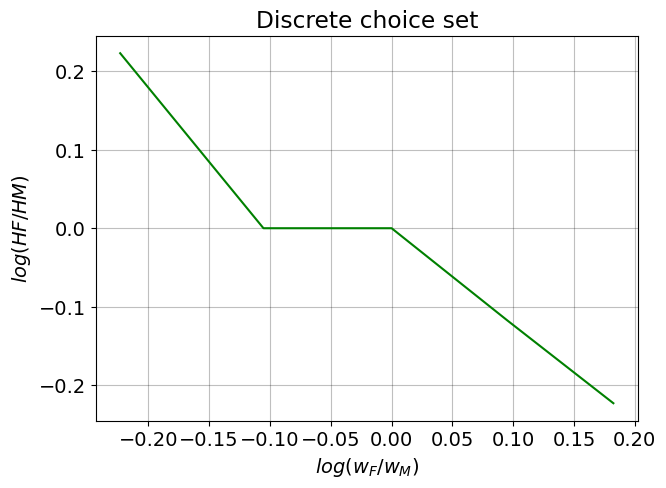

In [57]:
# Plot of the result

figure = plt.figure(figsize = (7,5))
ax = figure.add_subplot(1,1,1)
ax.plot(logw, logr, color = 'green')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Discrete choice set')

From the figure above it appears that the ratio of HF/HM, how much the female works at home relative to the male, decreases as the ration of female-to-male wages increases. However, from wF=0.9 to 1 the ratio stays constant, creating a kink in our graph. This might be solved by moving into continous time. 

# Question 3

Explain your code and procedure

In [69]:
# Defining a new model to reset parameters
q3 = MC.Household()

# Preparing new lists for log wage and log ratio
logw_2 = []
logr_2 = []

# Setting up for loop to solve for the different wF values:
for wF in q3.par.wF_vec:
    q3.par.wF = wF

    res = q3.solve_con()
    logw_2.append(np.log(q3.par.wF/q3.par.wM))
    logr_2.append(np.log(res.HF/res.HM))

    print(f'wF: {wF}, wM: {q3.par.wM} -> ratio: ({res.HF/res.HM})')

wF: 0.8, wM: 1.0 -> ratio: (1.2499899080996033)
wF: 0.9, wM: 1.0 -> ratio: (1.1111228136132947)
wF: 1.0, wM: 1.0 -> ratio: (1.0000038970170104)
wF: 1.1, wM: 1.0 -> ratio: (0.9090889104209171)
wF: 1.2, wM: 1.0 -> ratio: (0.8333440913331054)


As can be seen from the print(), we seem to have eliminated the kink observed in question 2. In order to verify this, lets continue by plotting the two ratios again:

Text(0.5, 1.0, 'Continous choice set')

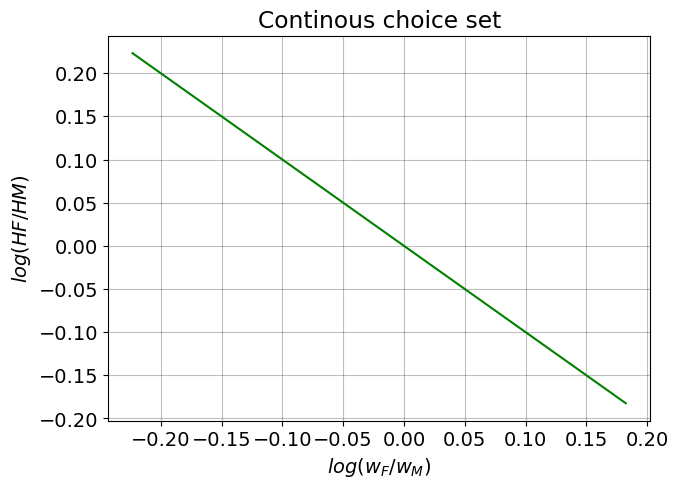

In [70]:
# Plot of the result

figure2 = plt.figure(figsize = (7,5))
ax = figure2.add_subplot(1,1,1)
ax.plot(logw_2, logr_2, color = 'green')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Continous choice set')

And as expected, the graph is now a smooth line depicting a falling ratio of female-to-male hours worked at home, as the female wage rises relative to the male wage.

# Question 4

In [80]:
q4 = MC.Household()



TypeError: minimize() missing 1 required positional argument: 'x0'